In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [2]:
df = pd.read_csv('/content/All_stocks.csv')

In [3]:
df.head

<bound method NDFrame.head of        Unnamed: 0        Date   Close    Volume    Open      High     Low  \
0               0  2023-03-24  160.25  59256340  158.86  160.3400  157.85   
1               1  2023-03-23  158.93  67622060  158.83  161.5501  157.68   
2               2  2023-03-22  157.83  75701810  159.30  162.1400  157.81   
3               3  2023-03-21  159.28  73938290  157.32  159.4000  156.54   
4               4  2023-03-20  157.40  73641420  155.07  157.8200  154.15   
...           ...         ...     ...       ...     ...       ...     ...   
32089        5109  2022-09-08  227.44   6693979  223.80  228.6900  221.33   
32090        5110  2022-09-09  233.57   6646273  230.61  234.7100  230.40   
32091        5111  2022-09-12  236.53   6014669  234.00  239.4900  233.62   
32092        5112  2022-09-13  218.13   7852039  226.29  227.5100  217.74   
32093        5113  2022-09-14  224.12   8181194  219.74  227.6500  215.83   

          Name  
0        Apple  
1        Ap

In [4]:
apple_df = df[df['Name'] == 'Apple']
amazon_df=df[df['Name'] == 'Amazon']
facebook_df=df[df['Name'] == 'Facebook']
google_classA_df=df[df['Name'] == 'Google_classA']
google_classC_df=df[df['Name'] == 'Google_classC']
netflix_df=df[df['Name'] == 'Netflix']


In [5]:
apple_df = apple_df.drop(columns=apple_df.columns.difference(['Date', 'Close']))

amazon_df = amazon_df.drop(columns=amazon_df.columns.difference(['Date', 'Close']))

facebook_df = facebook_df.drop(columns=facebook_df.columns.difference(['Date', 'Close']))

google_classA_df = google_classA_df.drop(columns=google_classA_df.columns.difference(['Date', 'Close']))

google_classC_df = google_classC_df.drop(columns=google_classC_df.columns.difference(['Date', 'Close']))

netflix_df = netflix_df.drop(columns=netflix_df.columns.difference(['Date', 'Close']))

In [6]:
apple_df.columns = ['ds','y']
amazon_df.columns = ['ds','y']
facebook_df.columns = ['ds','y']
google_classA_df.columns = ['ds','y']
google_classC_df.columns = ['ds','y']
netflix_df.columns = ['ds','y']

In [7]:
def fbprophet(df_names):
  model=Prophet()
  df_names.dropna(axis=0,inplace=True)
  model.fit(df_names)
  future_dates=model.make_future_dataframe(periods=365)
  prediction=model.predict(future_dates)
  model.plot(prediction)
  #### Visualize Each Components[Trends,yearly]
  model.plot_components(prediction)
  return prediction,model


### Apple Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvan5cdrh/buvv8ejs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvan5cdrh/a78s67hn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52007', 'data', 'file=/tmp/tmpvan5cdrh/buvv8ejs.json', 'init=/tmp/tmpvan5cdrh/a78s67hn.json', 'output', 'file=/tmp/tmpvan5cdrh/prophet_modeli9r7b640/prophet_model-20230327220651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:06:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


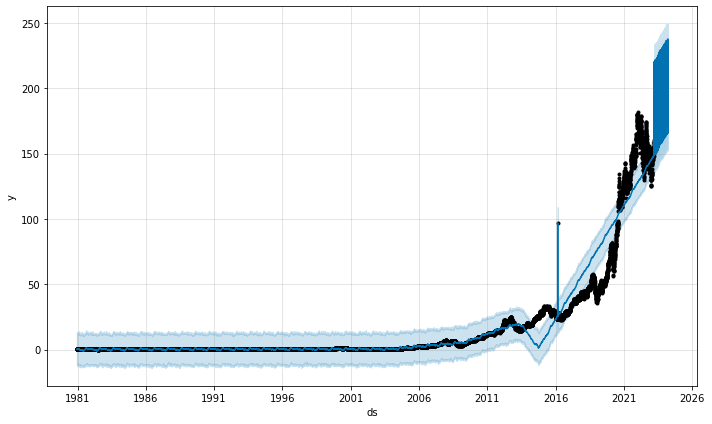

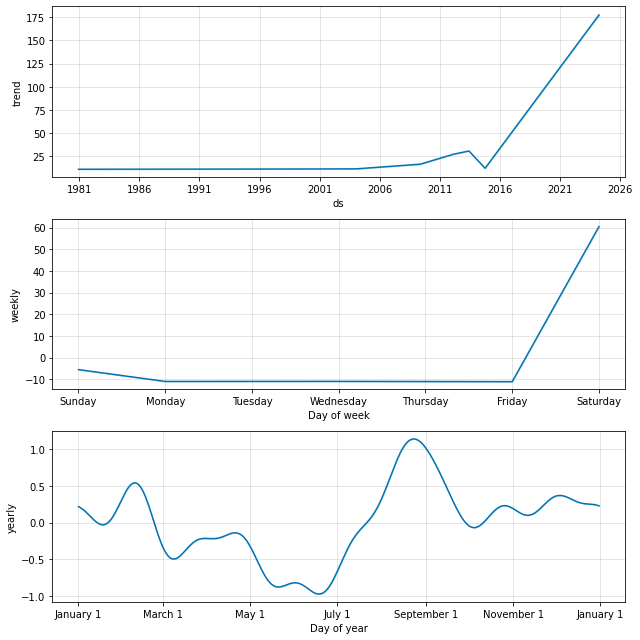

In [8]:
appl_pred,appl_model = fbprophet(apple_df)

In [ ]:
# Cross Validation
appl_cv = cross_validation(appl_model, initial='730 days', period='180 days', horizon = '365 days')

In [10]:
appl_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1983-04-19,0.212595,0.198925,0.226116,0.21,1983-04-18
1,1983-04-20,0.214225,0.200970,0.227382,0.23,1983-04-18
2,1983-04-21,0.214774,0.201646,0.227639,0.23,1983-04-18
3,1983-04-22,0.215459,0.202461,0.227919,0.23,1983-04-18
4,1983-04-25,0.217285,0.203993,0.230491,0.22,1983-04-18


In [11]:
# Performance Metrics
appl_p = performance_metrics(appl_cv)

In [12]:
appl_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,122.413968,11.064085,3.893256,0.301267,0.225292,0.301298,0.217538
1,38 days,121.902868,11.040963,3.886878,0.303292,0.226621,0.302637,0.217315
2,39 days,123.025678,11.091694,3.917276,0.304670,0.228011,0.303780,0.216603
3,40 days,124.326102,11.150162,3.948199,0.305558,0.228684,0.304825,0.215585
4,41 days,124.706663,11.167214,3.958325,0.306449,0.229156,0.305725,0.214534


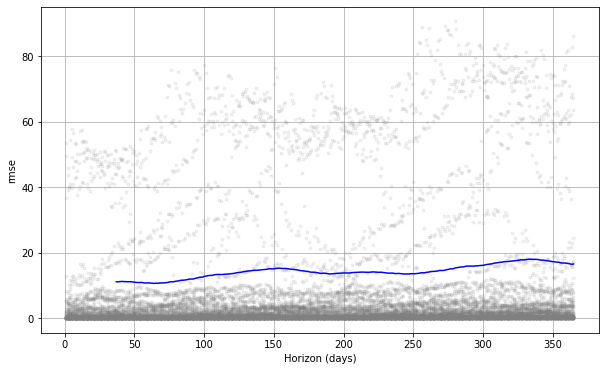

In [13]:
# Plotting 
fig1 = plot_cross_validation_metric(appl_cv, metric='rmse')

### Amazon Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvan5cdrh/et1cg6gv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvan5cdrh/57bim4u_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75426', 'data', 'file=/tmp/tmpvan5cdrh/et1cg6gv.json', 'init=/tmp/tmpvan5cdrh/57bim4u_.json', 'output', 'file=/tmp/tmpvan5cdrh/prophet_model5hawt76b/prophet_model-20230327221118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


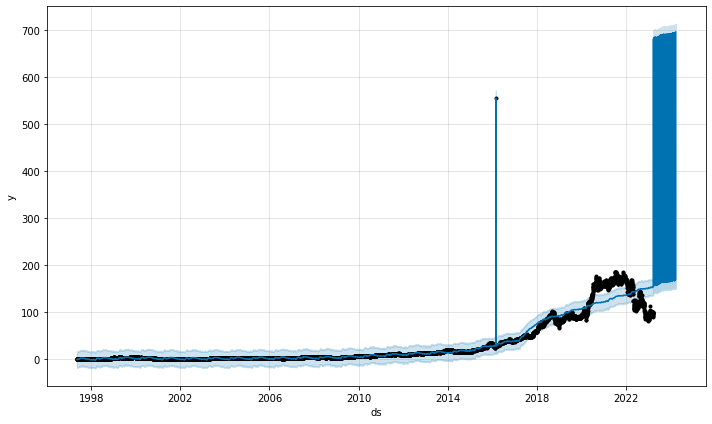

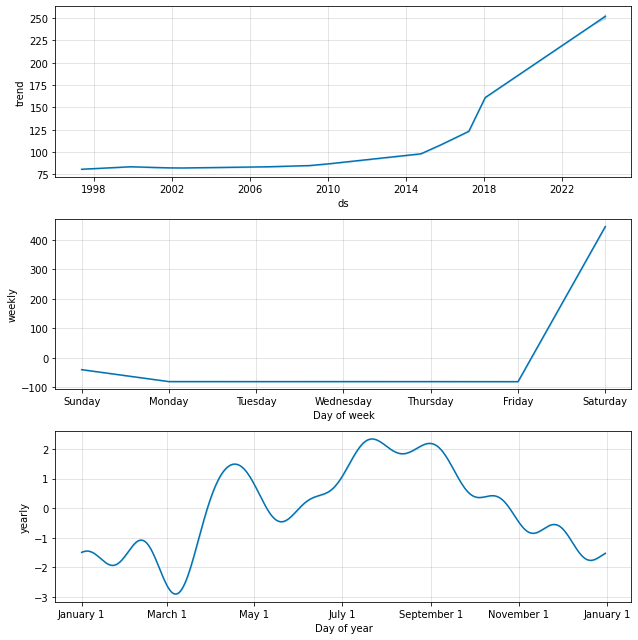

In [14]:
amz_pred,amz_model = fbprophet(amazon_df)

In [ ]:
# Cross Validation - Amazon
amz_cv = cross_validation(amz_model, initial='730 days', period='180 days', horizon = '365 days')

In [16]:
amz_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1999-07-26,3.118774,2.787015,3.464358,2.65,1999-07-23
1,1999-07-27,3.100575,2.751736,3.423841,2.52,1999-07-23
2,1999-07-28,3.104565,2.770432,3.460413,2.64,1999-07-23
3,1999-07-29,3.088200,2.719773,3.433601,2.54,1999-07-23
4,1999-07-30,3.093818,2.744746,3.434904,2.50,1999-07-23


In [17]:
# Performance Metrics - Amazon
amz_p = performance_metrics(amz_cv)

In [18]:
amz_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,74.857715,8.652035,4.271064,0.196030,0.134698,0.211286,0.424640
1,38 days,74.343400,8.622262,4.261848,0.196645,0.136398,0.211931,0.427057
2,39 days,77.034821,8.776948,4.307916,0.198523,0.136482,0.214325,0.426566
3,40 days,80.764387,8.986901,4.381039,0.200753,0.136598,0.216432,0.423986
4,41 days,83.581153,9.142273,4.436680,0.203229,0.136482,0.218110,0.423062


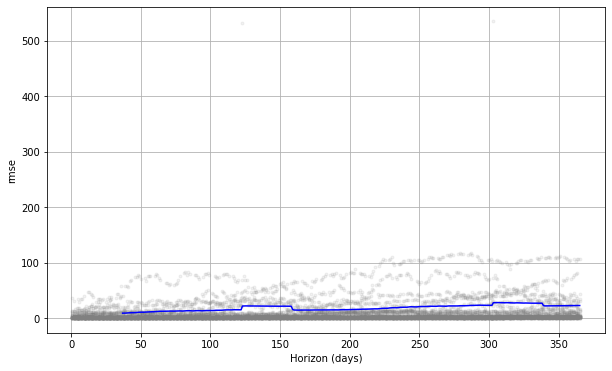

In [19]:
# Plotting - Amazon
fig2 = plot_cross_validation_metric(amz_cv, metric='rmse')

### Facebook Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvan5cdrh/24u0mwwm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvan5cdrh/xvfiyk2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96917', 'data', 'file=/tmp/tmpvan5cdrh/24u0mwwm.json', 'init=/tmp/tmpvan5cdrh/xvfiyk2w.json', 'output', 'file=/tmp/tmpvan5cdrh/prophet_model0q86kmdc/prophet_model-20230327221257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:12:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:12:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


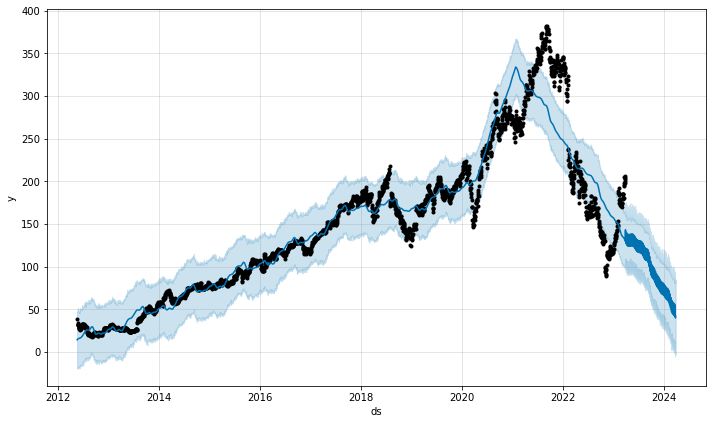

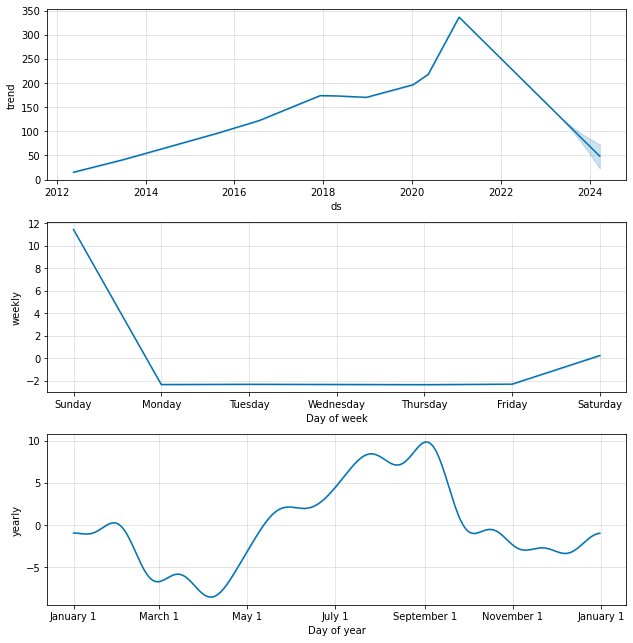

In [20]:
fb_pred,fb_model = fbprophet(facebook_df)

In [ ]:
# Cross Validation - Facebook
fb_cv = cross_validation(fb_model, initial='730 days', period='180 days', horizon = '365 days')

In [22]:
fb_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-11-03,78.589253,75.070743,81.673642,73.88,2014-11-01
1,2014-11-04,78.597254,75.107362,82.107508,75.76,2014-11-01
2,2014-11-05,78.616182,75.309185,81.939200,74.83,2014-11-01
3,2014-11-06,78.612908,75.219492,82.248558,75.26,2014-11-01
4,2014-11-07,78.540128,75.295548,82.116660,75.60,2014-11-01


In [23]:
# Performance Metrics - Facebook
fb_p = performance_metrics(fb_cv)

In [24]:
fb_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,1466.095833,38.289631,23.937580,0.127277,0.088690,0.117554,0.171642
1,37 days,1448.062004,38.053410,23.915778,0.127028,0.089193,0.117644,0.161692
2,38 days,1454.482860,38.137683,24.099542,0.127884,0.089797,0.118525,0.155133
3,39 days,1508.967097,38.845426,24.591282,0.130587,0.090464,0.120662,0.146766
4,40 days,1536.099414,39.193104,24.844025,0.132027,0.090694,0.121866,0.144279


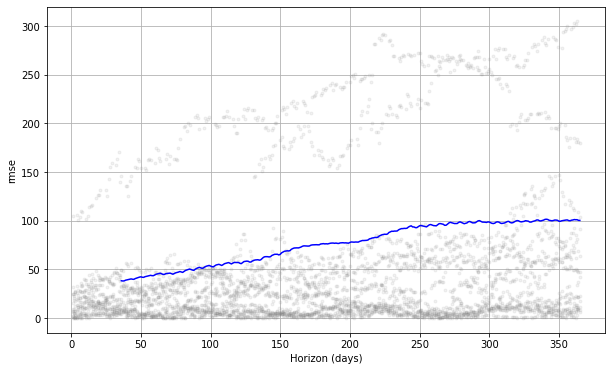

In [25]:
# Plotting - Facebook
fig3 = plot_cross_validation_metric(fb_cv, metric='rmse')

### Google Class A Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvan5cdrh/fxdknhdg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvan5cdrh/_cndbi3f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59367', 'data', 'file=/tmp/tmpvan5cdrh/fxdknhdg.json', 'init=/tmp/tmpvan5cdrh/_cndbi3f.json', 'output', 'file=/tmp/tmpvan5cdrh/prophet_modelr1iwxzlp/prophet_model-20230327221315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:13:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:13:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


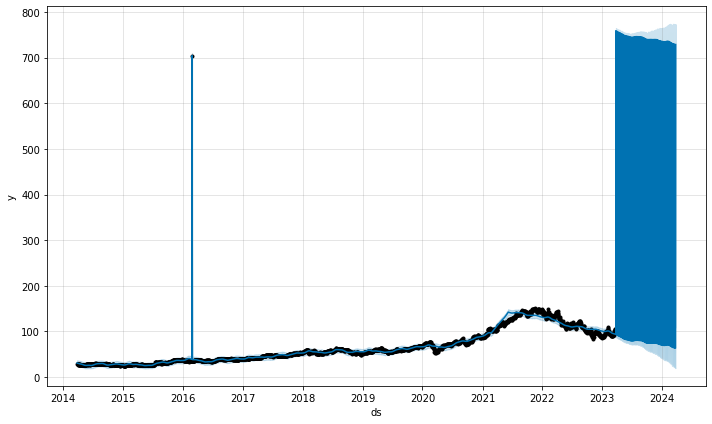

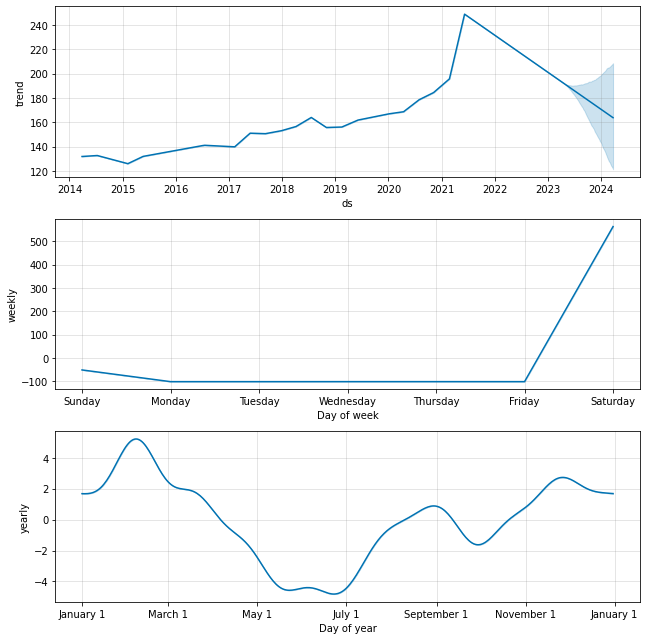

In [26]:
ga_pred,ga_model = fbprophet(google_classA_df)

In [ ]:
# Cross Validation - Google A
ga_cv = cross_validation(ga_model, initial='730 days', period='180 days', horizon = '365 days')

In [28]:
ga_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-04-25,37.814193,36.906388,38.606223,36.16,2016-04-24
1,2016-04-26,37.850868,37.050705,38.658198,35.41,2016-04-24
2,2016-04-27,37.943706,37.106264,38.710463,35.29,2016-04-24
3,2016-04-28,37.947537,37.068389,38.733206,34.55,2016-04-24
4,2016-04-29,37.982016,37.137852,38.791145,34.65,2016-04-24


In [29]:
# Performance Metrics - Google A
ga_p = performance_metrics(ga_cv)

In [30]:
ga_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,119.733064,10.942260,6.745890,0.085090,0.074080,0.084277,0.209990
1,37 days,121.435393,11.019773,6.840114,0.086421,0.075354,0.085746,0.204213
2,38 days,123.532650,11.114524,6.949926,0.087872,0.077151,0.087297,0.198777
3,39 days,132.396337,11.506361,7.188298,0.090253,0.080224,0.089557,0.191641
4,40 days,139.513542,11.811585,7.377489,0.092317,0.081228,0.091491,0.185933


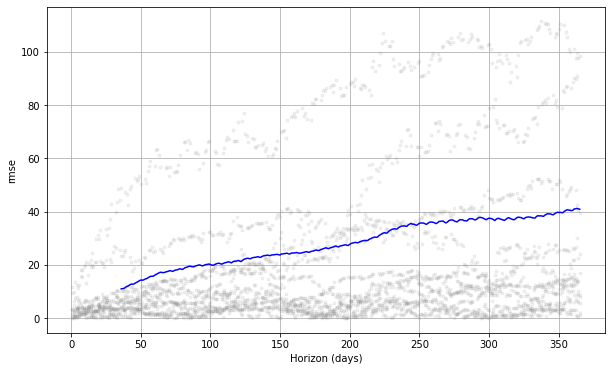

In [31]:
# Plotting - Google A
fig4 = plot_cross_validation_metric(ga_cv, metric='rmse')

### Google Class C Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvan5cdrh/ltvanuoc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvan5cdrh/j_36cfqy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76234', 'data', 'file=/tmp/tmpvan5cdrh/ltvanuoc.json', 'init=/tmp/tmpvan5cdrh/j_36cfqy.json', 'output', 'file=/tmp/tmpvan5cdrh/prophet_modelnzn0kzzu/prophet_model-20230327221337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:13:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:13:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


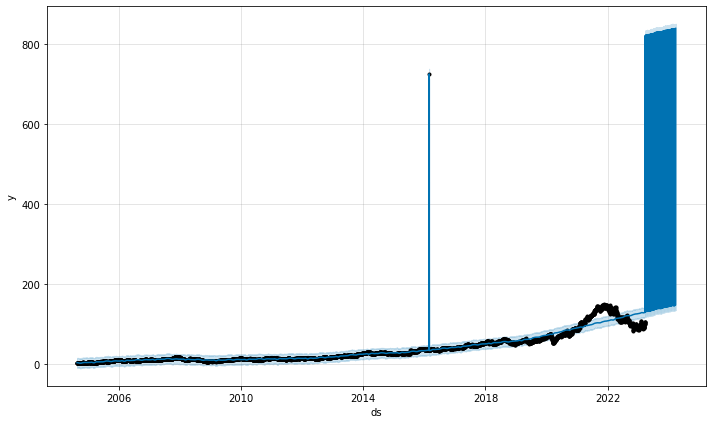

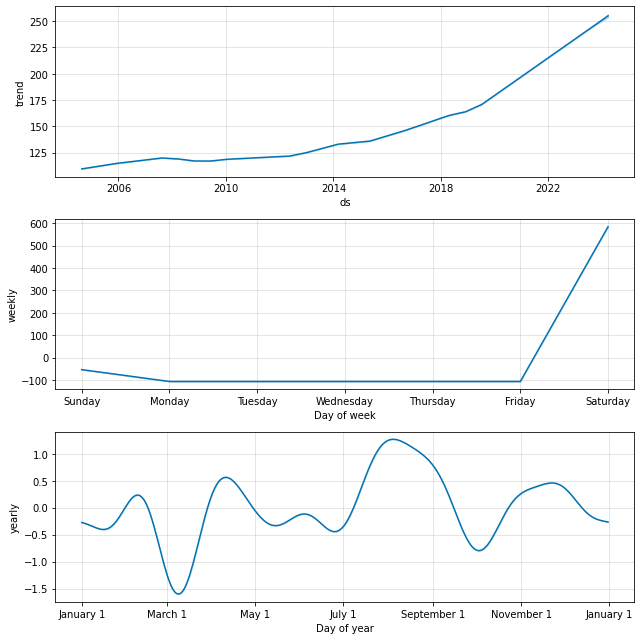

In [32]:
gc_pred,gc_model = fbprophet(google_classC_df)

In [ ]:
# Cross Validation - Google C
gc_cv = cross_validation(gc_model, initial='730 days', period='180 days', horizon = '365 days')

In [34]:
gc_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2006-12-14,12.342634,11.902884,12.801813,12.06,2006-12-13
1,2006-12-15,12.362861,11.885594,12.792651,12.02,2006-12-13
2,2006-12-18,12.409023,11.962515,12.840938,11.58,2006-12-13
3,2006-12-19,12.418071,11.996158,12.856558,11.73,2006-12-13
4,2006-12-20,12.427267,12.002613,12.853325,11.58,2006-12-13


In [35]:
# Performance Metrics - Google C
gc_p = performance_metrics(gc_cv)

In [36]:
gc_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,69.521072,8.337930,4.167650,0.093709,0.061521,0.094729,0.406589
1,38 days,71.450346,8.452831,4.220667,0.094224,0.061745,0.095366,0.402917
2,39 days,73.320997,8.562768,4.281723,0.094662,0.063827,0.095853,0.401065
3,40 days,74.499981,8.631337,4.326767,0.095374,0.065672,0.096543,0.395596
4,41 days,76.043420,8.720288,4.394165,0.096962,0.067879,0.097925,0.387352


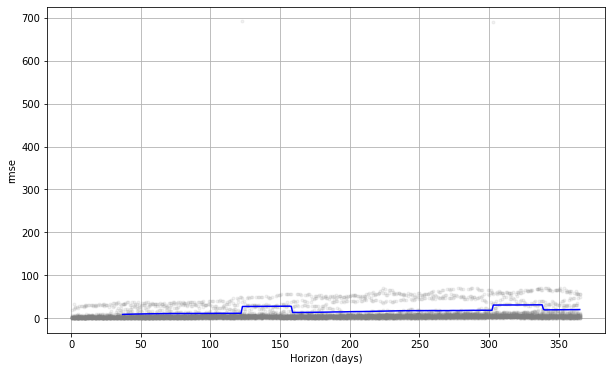

In [37]:
# Plotting - Google C
fig5 = plot_cross_validation_metric(gc_cv, metric='rmse')

### Netflix Stock Prediction

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvan5cdrh/2qvzyg_b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvan5cdrh/xtyqnv97.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57977', 'data', 'file=/tmp/tmpvan5cdrh/2qvzyg_b.json', 'init=/tmp/tmpvan5cdrh/xtyqnv97.json', 'output', 'file=/tmp/tmpvan5cdrh/prophet_modele56pe_l1/prophet_model-20230327221437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:14:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:14:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


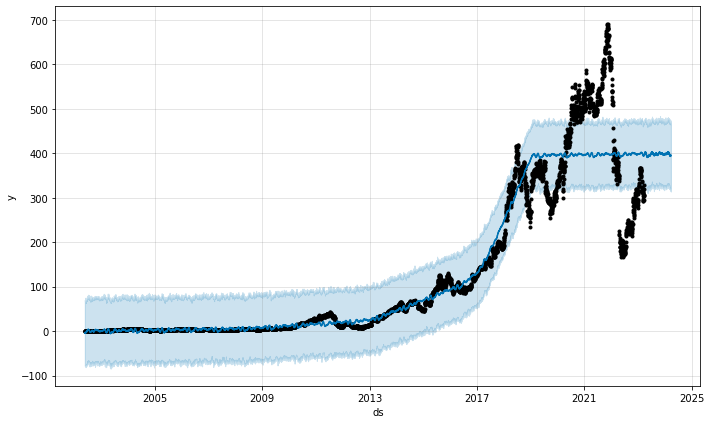

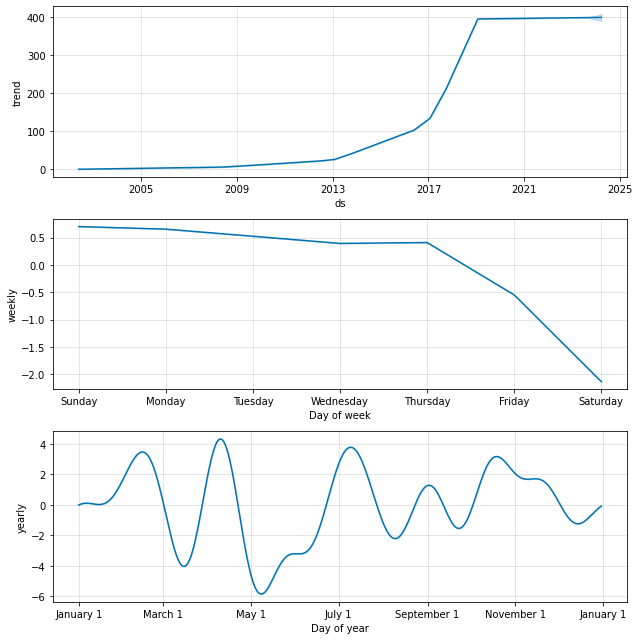

In [38]:
net_pred,net_model = fbprophet(netflix_df)

In [ ]:
# Cross Validation - Netflix
net_cv = cross_validation(net_model, initial='730 days', period='180 days', horizon = '365 days')

In [40]:
net_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2004-06-28,4.388517,4.100403,4.696373,4.86,2004-06-26
1,2004-06-29,4.399791,4.087165,4.711919,4.88,2004-06-26
2,2004-06-30,4.409836,4.125469,4.719138,5.14,2004-06-26
3,2004-07-01,4.448541,4.153210,4.744455,5.14,2004-06-26
4,2004-07-02,4.440788,4.129225,4.735130,4.62,2004-06-26


In [41]:
# Performance Metrics - Netflix
net_p = performance_metrics(net_cv)

In [42]:
net_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,3147.931402,56.106429,25.852979,0.313123,0.162415,0.262476,0.295209
1,38 days,3141.743105,56.051254,25.850259,0.312995,0.162415,0.263326,0.295547
2,39 days,3315.931779,57.584128,26.360961,0.314969,0.162119,0.264848,0.295467
3,40 days,3474.624692,58.945947,26.833789,0.320039,0.163600,0.268146,0.294720
4,41 days,3587.292429,59.894010,27.058341,0.325021,0.165883,0.271322,0.295010


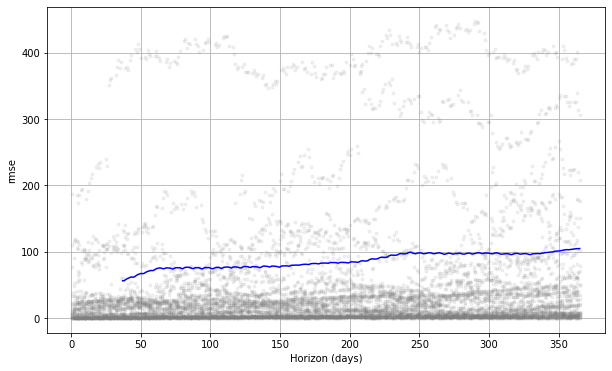

In [43]:
# Plotting - Netflix
fig6 = plot_cross_validation_metric(net_cv, metric='rmse')